In [ ]:
import tensorflow as tf

def load_and_prepare_cifar10(batch_size=32, val_size=5000):
    # Load CIFAR-10
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Normalize to [0, 1]
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Split training and validation sets
    x_val, y_val = x_train[-val_size:], y_train[-val_size:]
    x_train, y_train = x_train[:-val_size], y_train[:-val_size]

    # Create tf.data.Dataset objects
    train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

    # Shuffle, batch, and prefetch
    train_ds = train_ds.shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return train_ds, val_ds, test_ds


In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model


In [ ]:
# Load datasets
train_ds, val_ds, test_ds = load_and_prepare_cifar10()

# Get model
model = create_cnn_model(input_shape=(32, 32, 3), num_classes=10)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=15)

# Save the model
model.save("base_cnn_model.h5")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.2340 - loss: 2.0845 - val_accuracy: 0.3052 - val_loss: 2.2427
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3831 - loss: 1.6158 - val_accuracy: 0.5036 - val_loss: 1.3461
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4615 - loss: 1.4509 - val_accuracy: 0.4688 - val_loss: 1.4680
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5034 - loss: 1.3446 - val_accuracy: 0.5490 - val_loss: 1.2937
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5335 - loss: 1.2701 - val_accuracy: 0.6270 - val_loss: 1.0569
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5653 - loss: 1.1978 - val_accuracy: 0.6300 - val_loss: 1.0277
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5957 - loss: 1.1277 - val_accuracy: 0.5486 - val_loss: 1.3003
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt

def visualize_training_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()


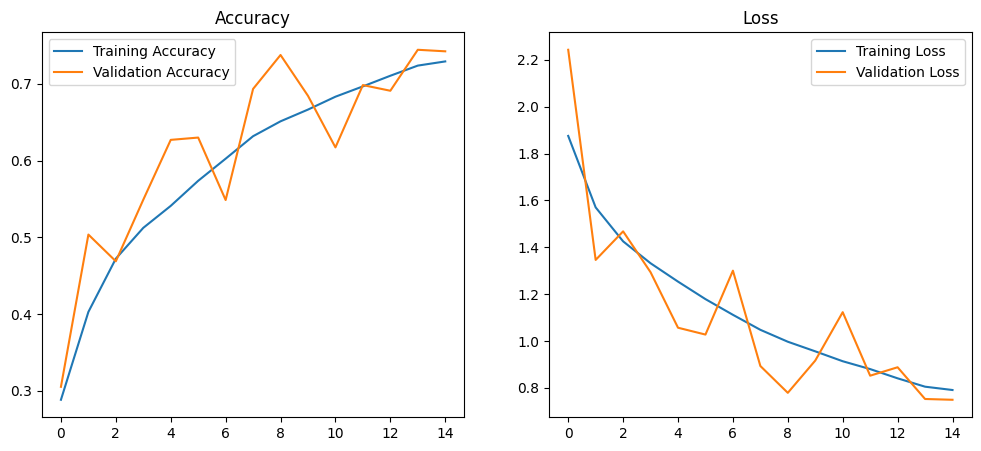

In [ ]:
visualize_training_results(history)



Training with batch size: 32
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.2523 - loss: 2.0329 - val_accuracy: 0.3300 - val_loss: 1.7990
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4050 - loss: 1.5682 - val_accuracy: 0.4754 - val_loss: 1.3947
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4855 - loss: 1.4047 - val_accuracy: 0.4926 - val_loss: 1.4544
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5256 - loss: 1.2991 - val_accuracy: 0.6224 - val_loss: 1.0904
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5585 - loss: 1.2184 - val_accuracy: 0.4826 - val_loss: 1.4027
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5851 - loss: 1.1537 - val_accuracy: 0.6642 - val_loss: 0.9570
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6100 - loss: 1.0925 - val_accuracy: 0.5504 - val_loss: 1.3062
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - 

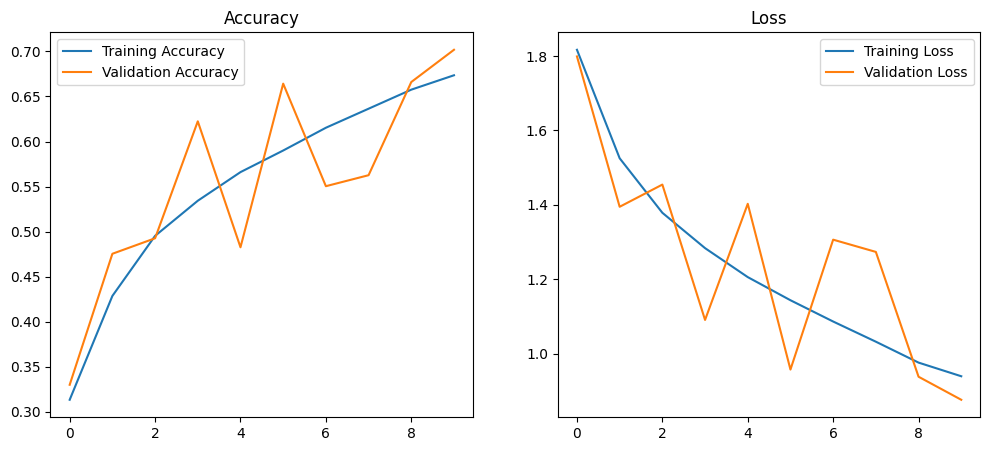


Training with batch size: 64
Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.2354 - loss: 2.1093 - val_accuracy: 0.4120 - val_loss: 1.6197
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3770 - loss: 1.6448 - val_accuracy: 0.5088 - val_loss: 1.3827
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4426 - loss: 1.4919 - val_accuracy: 0.5908 - val_loss: 1.1845
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4870 - loss: 1.3830 - val_accuracy: 0.5758 - val_loss: 1.2223
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5069 - loss: 1.3303 - val_accuracy: 0.6178 - val_loss: 1.1286
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5289 - loss: 1.2679 - val_accuracy: 0.6306 - val_loss: 1.0368
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5437 - loss: 1.2335 - val_accuracy: 0.6286 - val_loss: 1.0386
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5684 -

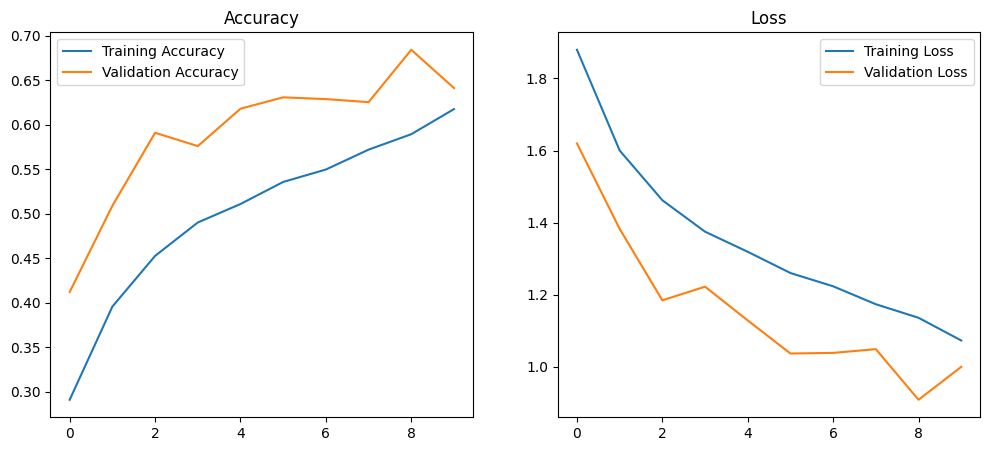


Training with batch size: 256
Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.2026 - loss: 2.2725 - val_accuracy: 0.1048 - val_loss: 2.9376
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3634 - loss: 1.6832 - val_accuracy: 0.2528 - val_loss: 2.1927
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4394 - loss: 1.5075 - val_accuracy: 0.3728 - val_loss: 1.6950
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4866 - loss: 1.3873 - val_accuracy: 0.5438 - val_loss: 1.2441
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5255 - loss: 1.3046 - val_accuracy: 0.6062 - val_loss: 1.1298
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5572 - loss: 1.2274 - val_accuracy: 0.5884 - val_loss: 1.1307
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5785 - loss: 1.1759 - val_accuracy: 0.5770 - val_loss: 1.1509
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy:

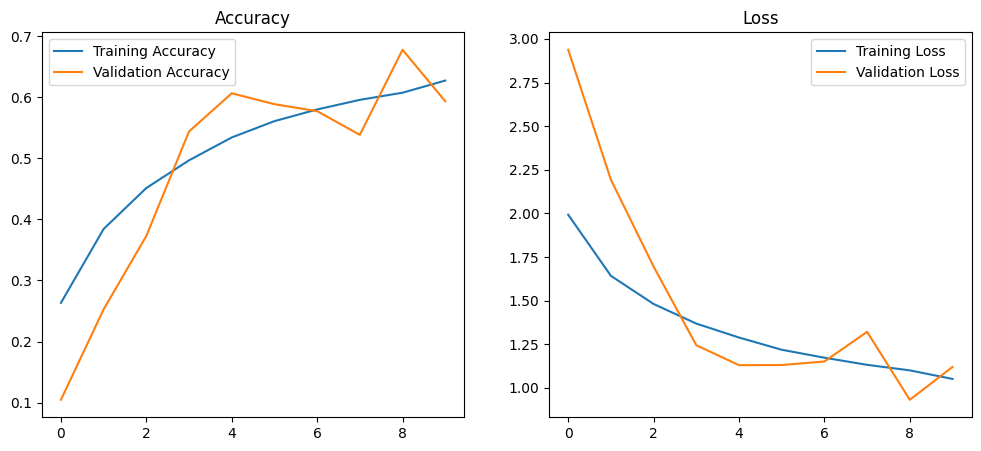

In [ ]:
# train the batch sizes
for batch_size in [32, 64, 256]:
    print(f"\nTraining with batch size: {batch_size}")
    train_ds, val_ds, _ = load_and_prepare_cifar10(batch_size=batch_size)
    model = create_cnn_model(input_shape=(32, 32, 3), num_classes=10)
    history = model.fit(train_ds, validation_data=val_ds, epochs=10)
    visualize_training_results(history)


In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))



TensorFlow version: 2.18.0
Num GPUs Available: 1


Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.2111 - loss: 2.3696 - val_accuracy: 0.0978 - val_loss: 2.8681 - learning_rate: 0.0010
Epoch 2/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3752 - loss: 1.6636 - val_accuracy: 0.1804 - val_loss: 2.5033 - learning_rate: 0.0010
Epoch 3/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4441 - loss: 1.4867 - val_accuracy: 0.5228 - val_loss: 1.3514 - learning_rate: 0.0010
Epoch 4/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4845 - loss: 1.3889 - val_accuracy: 0.5850 - val_loss: 1.1486 - learning_rate: 0.0010
Epoch 5/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5205 - loss: 1.3079 - val_accuracy: 0.5920 - val_loss: 1.1980 - learning_rate: 0.0010
Epoch 6/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5361 - loss: 1.2689 - val_accuracy: 0.6310 - val_loss: 1.0827 - learning_rate: 0.0010
Epoch 7/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5589 - loss: 1

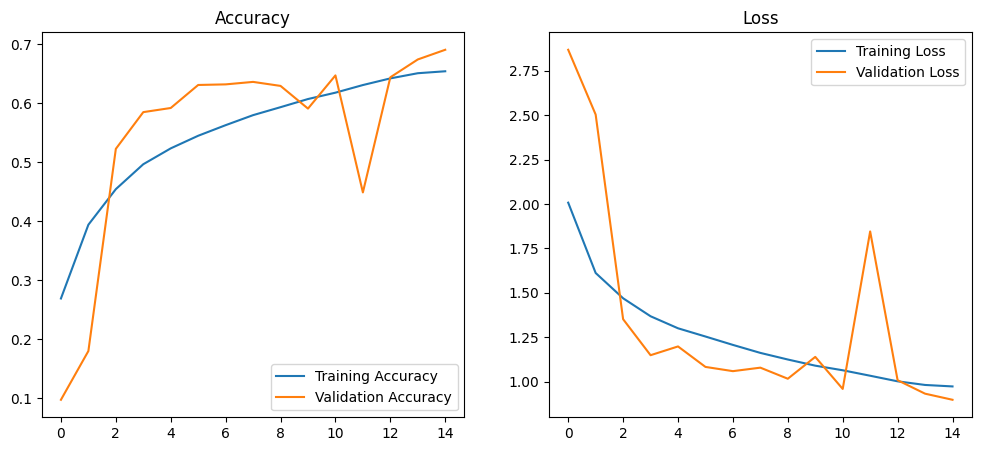

In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

model = create_cnn_model(input_shape=(32, 32, 3), num_classes=10)
history = model.fit(train_ds, validation_data=val_ds, epochs=15, callbacks=[lr_scheduler])
visualize_training_results(history)


In [ ]:
# Network Depth vs. Width
def create_wider_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(64, (3, 3), padding='same'),  # Wider: more filters
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
# deeper network
def create_deeper_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
# Data Augmentation Layer
from tensorflow.keras import layers

def create_augmentation_layer():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1)
    ])


In [ ]:
# add Augmentation to the Model Input
def create_augmented_cnn_model(input_shape, num_classes):
    data_augmentation = create_augmentation_layer()

    model = models.Sequential([
        layers.Input(shape=input_shape),
        data_augmentation,  # ← Augmentation layer here

        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.2238 - loss: 2.2024 - val_accuracy: 0.1060 - val_loss: 3.5164
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3875 - loss: 1.6609 - val_accuracy: 0.1982 - val_loss: 2.6978
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4576 - loss: 1.4843 - val_accuracy: 0.3894 - val_loss: 1.7727
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4980 - loss: 1.3633 - val_accuracy: 0.5130 - val_loss: 1.3262
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5357 - loss: 1.2756 - val_accuracy: 0.5668 - val_loss: 1.1911
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5631 - loss: 1.2058 - val_accuracy: 0.5902 - val_loss: 1.1566
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5828 - loss: 1.1631 - val_accuracy: 0.5896 - val_loss: 1.1027
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6047 - loss: 1.1066 - val_acc

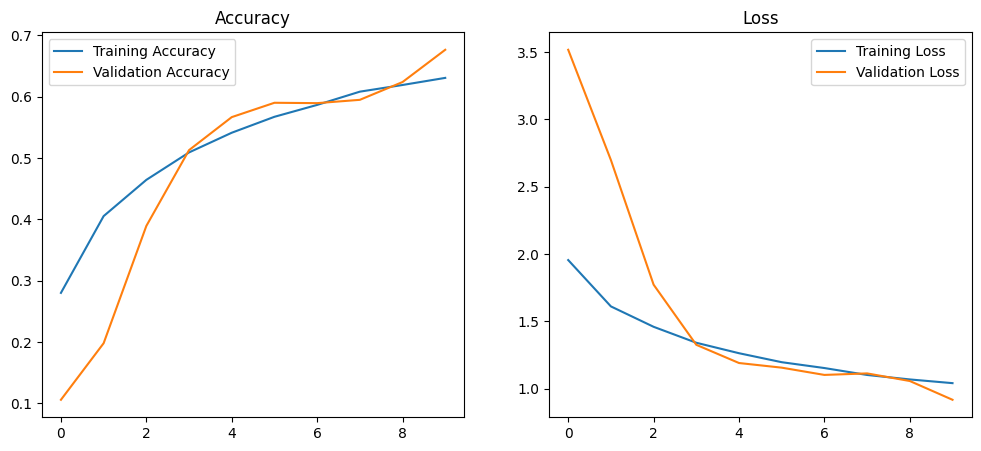

Augmented CNN:


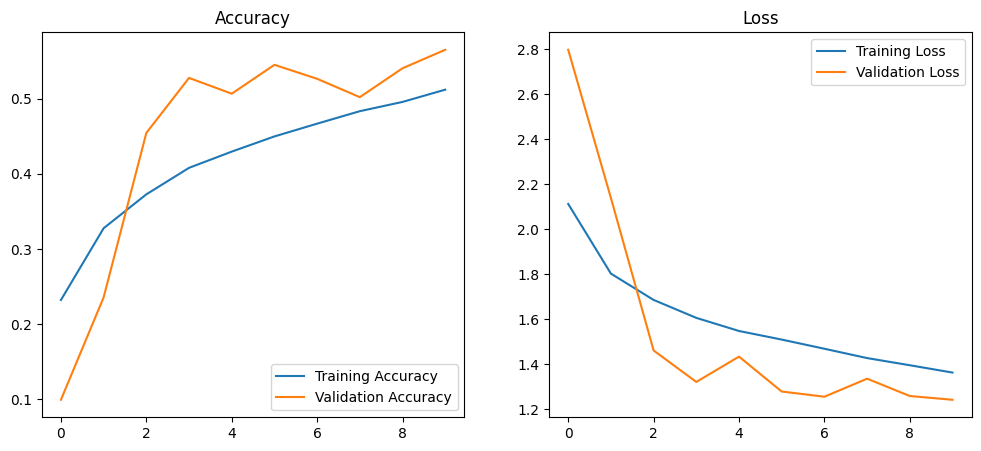

In [ ]:
# training model without aug

base_model = create_cnn_model(input_shape=(32, 32, 3), num_classes=10)
base_history = base_model.fit(train_ds, validation_data=val_ds, epochs=10)

# With augmentation
aug_model = create_augmented_cnn_model(input_shape=(32, 32, 3), num_classes=10)
aug_history = aug_model.fit(train_ds, validation_data=val_ds, epochs=10)

# Visualize both
print("Base CNN:")
visualize_training_results(base_history)
print("Augmented CNN:")
visualize_training_results(aug_history)


In [ ]:
# Create Transfer Learning Model Using VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras import layers

def create_transfer_learning_model(input_shape, num_classes):
    # Load base model with pretrained weights
    base_model = VGG16(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    # Custom head
    inputs = layers.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.2970 - loss: 1.9599 - val_accuracy: 0.5240 - val_loss: 1.3933
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.4848 - loss: 1.4821 - val_accuracy: 0.5564 - val_loss: 1.2764
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.5226 - loss: 1.3764 - val_accuracy: 0.5736 - val_loss: 1.2310
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.5361 - loss: 1.3309 - val_accuracy: 0.5818 - val_loss: 1.2032
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.5522 - loss: 1.2932 - val_accuracy: 0.5932 - val_loss: 1.1779
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5591 - loss: 1.2591 - val_accuracy: 0.5954 - val_loss: 1.1686
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.5649 - loss: 1.2489 - val_accuracy: 0.6018 - val_loss: 1.1512
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 

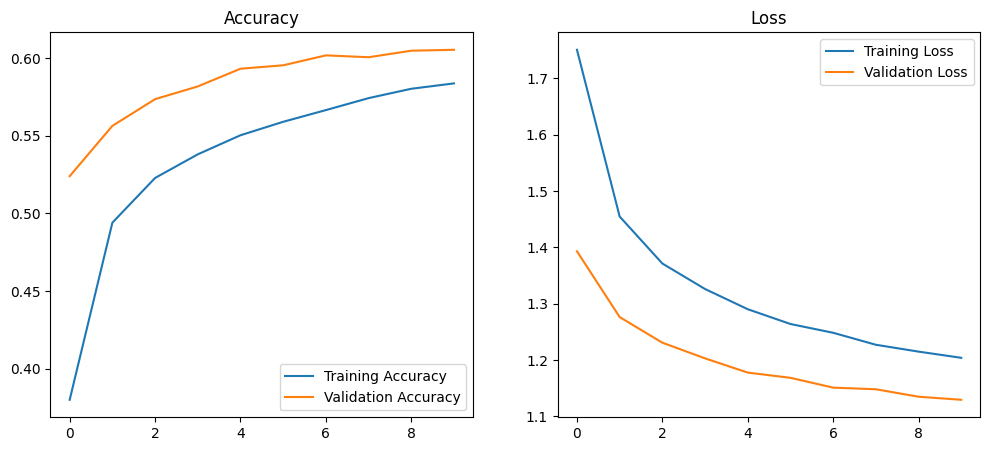

In [ ]:
# Train the Transfer Learning Model
# Create and train model
tl_model = create_transfer_learning_model(input_shape=(32, 32, 3), num_classes=10)
tl_history = tl_model.fit(train_ds, validation_data=val_ds, epochs=10)

# Save model
tl_model.save("transfer_learning_model.h5")

# Visualize training
visualize_training_results(tl_history)


In [ ]:
# Transfer Learning with ResNet50
from tensorflow.keras.applications import ResNet50

def create_resnet_transfer_model(input_shape, num_classes):
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False

    inputs = layers.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 28s 87ms/step - accuracy: 0.0999 - loss: 2.5020 - val_accuracy: 0.1078 - val_loss: 2.3017
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1071 - loss: 2.2976 - val_accuracy: 0.1218 - val_loss: 2.2764
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.1226 - loss: 2.2777 - val_accuracy: 0.1744 - val_loss: 2.2264
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1371 - loss: 2.2380 - val_accuracy: 0.2304 - val_loss: 2.1494
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.1523 - loss: 2.1954 - val_accuracy: 0.2622 - val_loss: 2.1131
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1631 - loss: 2.1758 - val_accuracy: 0.2548 - val_loss: 2.0727
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1679 - loss: 2.1681 - val_accuracy: 0.2654 - val_loss: 2.0723
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 22

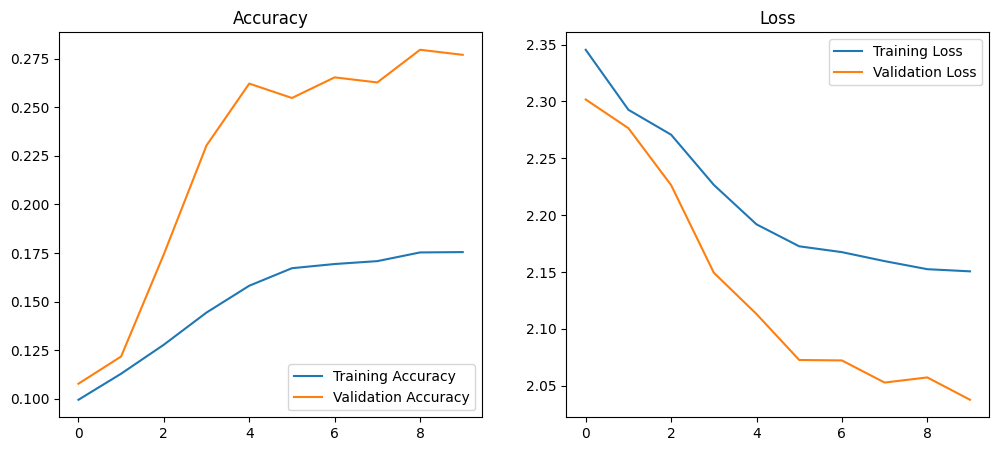

In [ ]:
# train and compare
# Train ResNet50 model
resnet_model = create_resnet_transfer_model(input_shape=(32, 32, 3), num_classes=10)
resnet_history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

# Visualize training results
visualize_training_results(resnet_history)


In [ ]:
#  Try EfficientNetB0
from tensorflow.keras.applications import EfficientNetB0

def create_efficientnet_model(input_shape, num_classes):
    base_model = EfficientNetB0(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False

    inputs = layers.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━

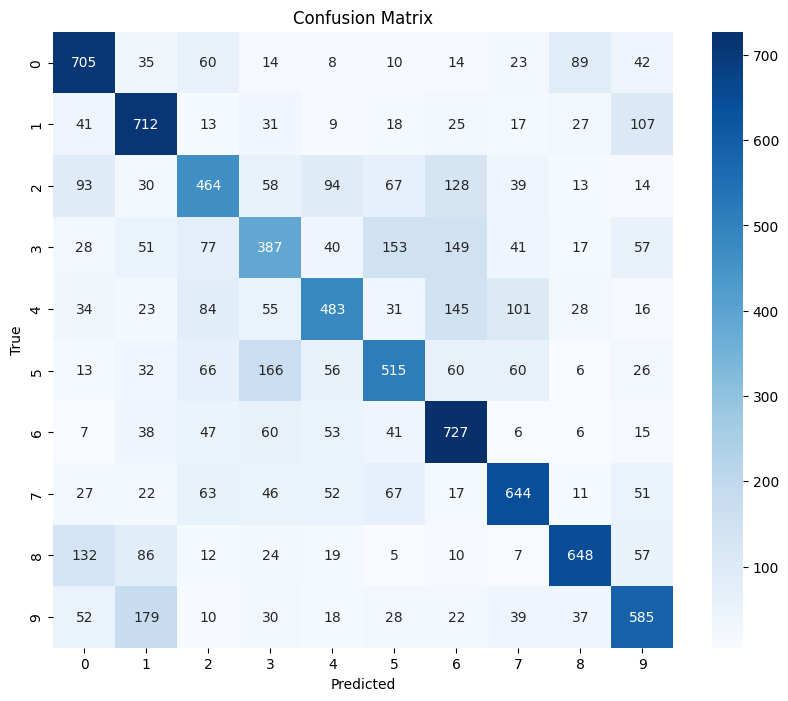

              precision    recall  f1-score   support

    airplane       0.62      0.70      0.66      1000
  automobile       0.59      0.71      0.64      1000
        bird       0.52      0.46      0.49      1000
         cat       0.44      0.39      0.41      1000
        deer       0.58      0.48      0.53      1000
         dog       0.55      0.52      0.53      1000
        frog       0.56      0.73      0.63      1000
       horse       0.66      0.64      0.65      1000
        ship       0.73      0.65      0.69      1000
       truck       0.60      0.58      0.59      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.58     10000
weighted avg       0.59      0.59      0.58     10000



In [ ]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get test dataset
_, _, test_ds = load_and_prepare_cifar10()

# Get true and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = np.argmax(tl_model.predict(images), axis=1)  # change model name if needed
    y_true.extend(labels.numpy().flatten())
    y_pred.extend(preds)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=[
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

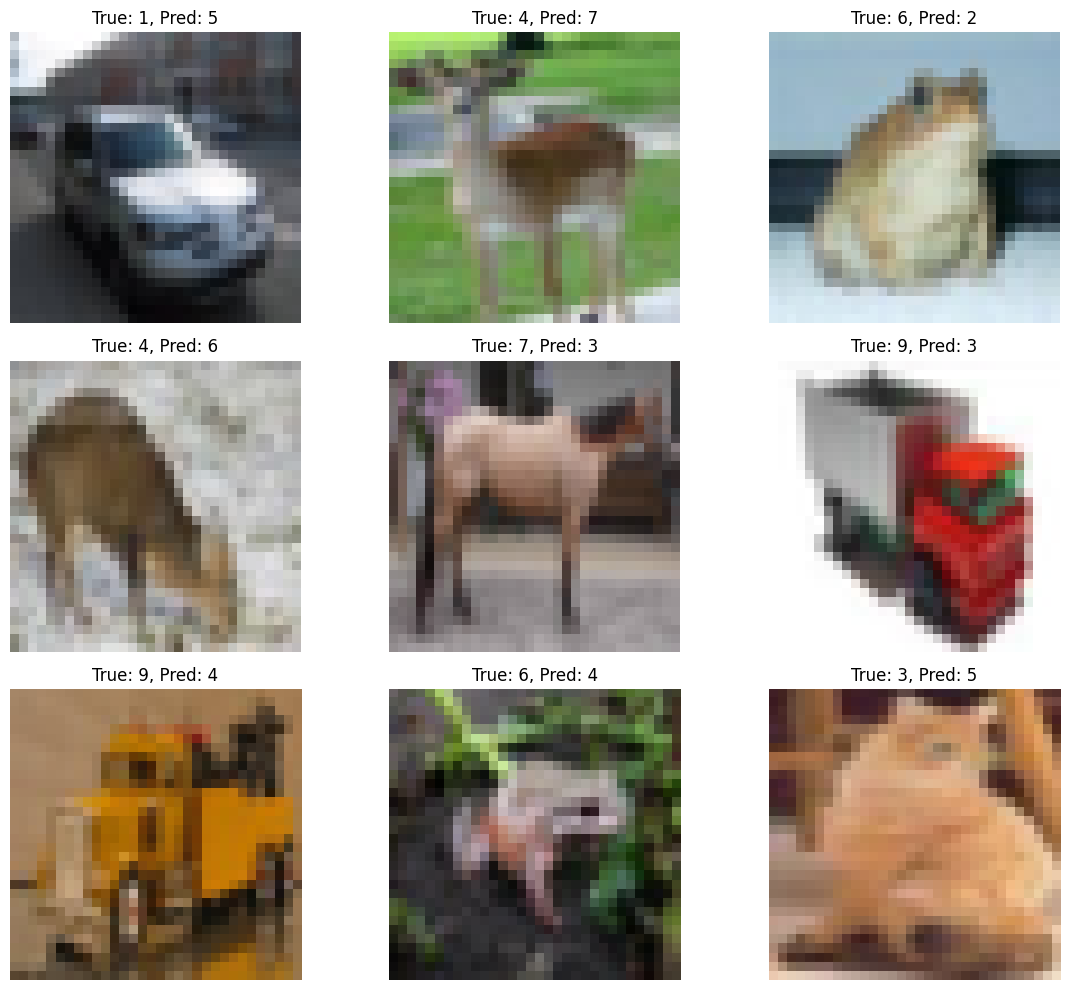

In [ ]:
# misclassified images

import random

misclassified = []
for images, labels in test_ds:
    preds = np.argmax(tl_model.predict(images), axis=1)
    for img, true, pred in zip(images, labels.numpy().flatten(), preds):
        if true != pred:
            misclassified.append((img.numpy(), true, pred))

# Plot some misclassified images
plt.figure(figsize=(12, 10))
for i in range(9):
    img, true, pred = random.choice(misclassified)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f"True: {true}, Pred: {pred}")
    plt.axis('off')
plt.tight_layout()
plt.show()
